# Numerical Optimization: General Review
- Pol Riba \& Jordi Segura

## 1 - One Dimensional Case

### 1 -

Text(0.5, 1.0, 'x^3 -2x +2')

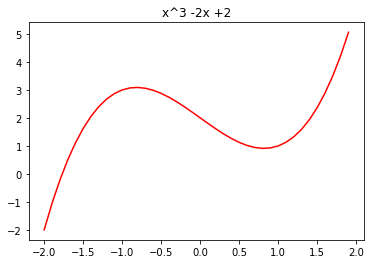

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2, 2, 0.1)

def f(x):
    return x**3 - 2*x + 2

plt.plot(x,f(x), 'r')
plt.title('x^3 -2x +2')

### 2 - 

If we do the derivative of the function, we get:
$$f'(x) = 3x^2 - 2$$

Doing $f'(x) = 0$, we find two zeros $z_1 = \sqrt{\frac{2}{3}}$ and $z_2 = - \sqrt{\frac{2}{3}}$. We may check that these points correspond to the flat points in the plot above:

(0.816496580927726, -0.816496580927726)

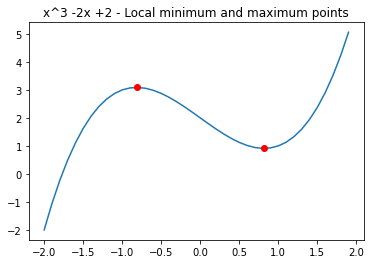

In [3]:
z1 = np.sqrt(2/3)
z2 = -np.sqrt(2/3)

plt.plot(x, f(x))
plt.plot(z1, f(z1), 'ro')
plt.plot(z2, f(z2), 'ro')
plt.title('x^3 -2x +2 - Local minimum and maximum points')
z1,z2

### 3 - 

If we want to check that $z_1$ is the minimum and $z_2$ is the maximum, we may use the second derivative:

$$ f''(x) = 6x $$

Let's calculate if these points are negative or positive:

In [6]:
def f1(x):
    return 3*x**2 -2
def f2(x):
    return 6*x

print(f"2nd derivative of the first zero {f2(z1)} > 0, therefore it's a minima")
print(f"2nd derivative of the second zero {f2(z2)} < 0, therefore it's a maxima")

2nd derivative of the first zero 4.898979485566356 > 0, therefore it's a minima
2nd derivative of the second zero -4.898979485566356 < 0, therefore it's a maxima


Text(0.5, 1.0, 'x^3 -2x +2 - Taylor series vs function')

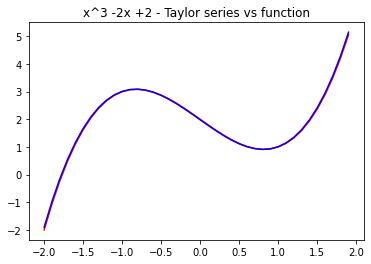

In [9]:
def Taylor(x, d):
    y = f(x) + d*f1(x) + d**2/2*f2(x)
    return y

d = 1e-2
plt.plot(x,f(x), 'r')
plt.plot(x, Taylor(x, d), 'blue')
plt.title('x^3 -2x +2 - Taylor series vs function')

### 4 -

Text(0.5, 1.0, '6x - "2nd derivative"')

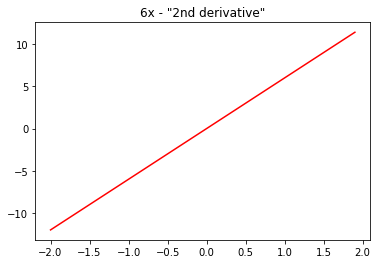

In [11]:
plt.plot(x,f2(x), 'r')
plt.title('6x - "2nd derivative"')

# Two dimensional Case
## A simple two-dimensional function

In [12]:
def f2d(x1, x2):
    return x1**2 + x2**2

x1 = np.arange(-20, 20, 0.1)
x2 = x1

### 1 -  

In [18]:
def plot3d(x1,x2,f):
    
    ax = plt.axes(projection='3d')
    # Data for a three-dimensional line
    ax.plot3D(x1, x2, f(x1, x2), 'gray')

Text(0.5, 0.92, '3D plot - x1^2 + x2^2 ')

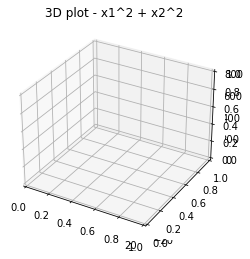

In [23]:
plot3d(x1,x2,f2d)
ax = plt.axes(projection='3d')
ax.set_title('3D plot - x1^2 + x2^2 ')

### 2 -

The gradient of the function is defined as $\nabla f = (\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2})$. Analytically, we get that the gradient is:

$$ \nabla f = (2x_1, 2x_2)$$ 

With two zeros in $x_1 = 0$ and $x_2 = 0$.

### 3 -

The Hessian $\nabla ^2 f$ in this case with $x_1$ and $x_2$ is defined as:
\begin{bmatrix}
  \frac{\partial f}{\partial x_1^2} & 
    \frac{\partial f}{\partial x_1 \partial x_2}\\[1ex] % <-- 1ex more space between rows of matrix
  \frac{\partial f}{\partial x_2 \partial x_1} & 
    \frac{\partial f}{\partial x_2^2}
\end{bmatrix}

Thus, we get:


\begin{bmatrix}
  2 & 
    0\\[1ex] % <-- 1ex more space between rows of matrix
  0 & 
    2
\end{bmatrix}


Being $A$ the Hessian matrix the eigenvalues of this, matrix are the values $\lambda = (\lambda_1, \lambda_2)$ such that $Av = \lambda v$, $\forall v \in \mathbb{R}^2$. So are the values such that satisfy:

$$ |A - \lambda I| = 0$$

\begin{vmatrix}
  2-\lambda & 
    0\\[1ex] % <-- 1ex more space between rows of matrix
  0 & 
    2 - \lambda
\end{vmatrix}

We end up with $\lambda_1$ = 2 and $\lambda_2$ = 2. All of them positives, therefore we have a minimum following the definition of (3). 


### 4 -

In [24]:
def fa(x1,x2):
    return -x1**2 -x2**2
def fb(x1,x2):
    return x1**2 -x2**2
def fc(x1,x2):
    return x1**2

In [25]:
# Contour plot
def contour_plot(x1,x2,f):
    # Creating 2-D grid of features
    [X, Y] = np.meshgrid(x1, x2)
    fig, ax = plt.subplots(1, 1)
    # plots contour lines
    ax.contourf(X, Y, f(X,Y))
    ax.set_title('Contour Plot')
    ax.set_xlabel('feature_x1')
    ax.set_ylabel('feature_x2')

    plt.show()

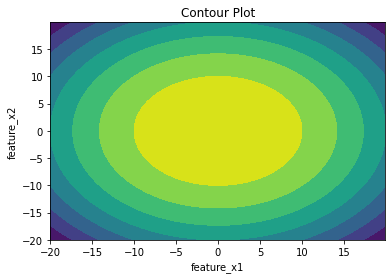

In [26]:
contour_plot(x1,x2,fa)

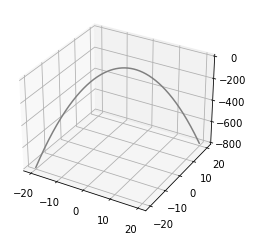

In [27]:
plot3d(x1,x2,fa)

It seems that at (0,0) our $\nabla f$ = 0

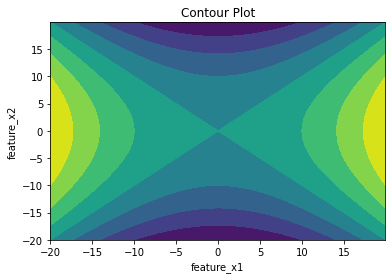

In [28]:
contour_plot(x1,x2,fb)

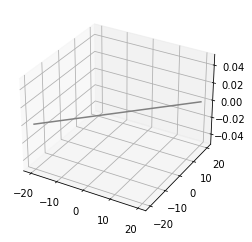

In [ ]:
plot3d(x1,x2,fb)

It seems that at $\forall x$ our $\nabla f$ = 0

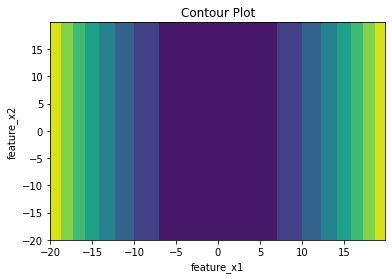

In [71]:
contour_plot(x1,x1,fc)

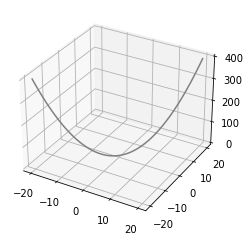

In [72]:
plot3d(x1,x1,fc)

It seems that at (0,0) our $\nabla f$ = 0

 # A two dimensional function with multiple minima
 

### 1-

Given the function:
$f(x_1,x_2)=x_1^2(4-2.1x_1^2+ \frac{x_1^4}{3} + x_1x_2 + x_2^2(-4 + 4x_2^2)$ 

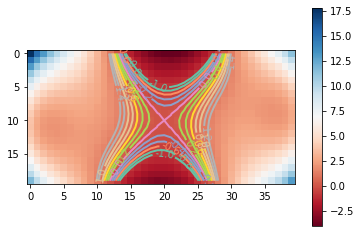

In [9]:
import numpy as np
from numpy import exp,arange
import matplotlib.pyplot as plt
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

x = np.arange(-2, 2, 0.1)
y = np.arange(-1, 1, 0.1)

def g(x,y):
    return (x**2)*(4-(2.1*(x**2))+(x**4)/3)+x*y+(y**2)*(-4+4*(x**2))

X,Y = meshgrid(x, y) # grid of point
Z = g(X, Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
show()

C:\Users\polri\AppData\Local\Temp/ipykernel_21380/3856914243.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


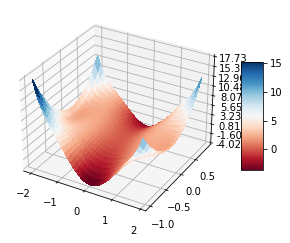

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

The minimum points of the function seem to be the following: (0,-1) & (0,1)


### 2-

$\nabla f(x)$ = $(2x_1^5 - 8.4x_1^3 + 8x_1 + x_2  ,  16x_2^3 - 8x_2 + x_1)$

### 3-


#### a)

$\nabla^2 f(x)$ = 
\begin{bmatrix}
  10x_1^4-25.2x_1^2+8 & 
    1\\[1ex] % <-- 1ex more space between rows of matrix
  1 & 
    48x_2^2-8
\end{bmatrix}

In [1]:
def H(x,y): 
    return [[10*x**4-25.2*x**2+8, 1], [1, 48*y**2-8]]